In [1]:
#importing the necessary library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#check the memory size the datasets given takes 

In [2]:
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None).memory_usage(index=False,deep=True)

0      260488
1     2144611
2      260488
3     2163148
4      260488
5     2357874
6     2285844
7     2185486
8     2068893
9     2040324
10     260488
11     260488
12     260488
13    2288838
14    2043502
dtype: int64

In [3]:
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 20.2 MB


The given dataset takes total of 20.2MB of memory 

## Load the data 

In [4]:
train_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
test_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,skiprows=1)

In [8]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
0     16281 non-null int64
1     16281 non-null object
2     16281 non-null int64
3     16281 non-null object
4     16281 non-null int64
5     16281 non-null object
6     16281 non-null object
7     16281 non-null object
8     16281 non-null object
9     16281 non-null object
10    16281 non-null int64
11    16281 non-null int64
12    16281 non-null int64
13    16281 non-null object
14    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 10.1 MB


In [9]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [10]:
column_lable = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
                'capital-gain','capital-loss','hours-per-week','native-country','wage_class']

In [11]:
train_df.columns = column_lable

In [12]:
test_df.columns = column_lable

In [13]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## Exploratory Data Analysis 

In [15]:
train_df.shape

(32561, 15)

In [ ]:
#train dataset has total of 32561 rows and 15 columns 

In [16]:
test_df.shape

(16281, 15)

In [ ]:
#test dataset has total of 16281 rows and 15 columns 

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
train_df.count(numeric_only=True).count()

6

In [ ]:
#total number of numeric columns present in dataset is 6

In [19]:
train_df.shape[1] #train_df.count().count()

15

In [20]:
train_df.shape[1]-train_df.count(numeric_only=True).count()

9

In [ ]:
#total number of categorical columns present in dataset is 9

In [21]:
#missing values 
train_df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
wage_class        False
dtype: bool

In [22]:
test_df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
wage_class        False
dtype: bool

in the dataset the null values or missing values are not present. 

In [23]:
train_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
train_df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [25]:
#Wage_class has 2 unique counts
train_df['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [26]:
#native-country has 42 unique count
train_df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
#from the data of the unique count there is a value ? which needs to be replaced 


In [27]:
#sex has 2 unique count
train_df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [28]:
#race has 5 unique count
train_df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [29]:
#relationship has 6 unique count
train_df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [30]:
#occupation has 15 unique count
train_df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
#from the above unique count there is a value ? which nedds to be replced 

In [31]:
#marital-status has 7 unique count
train_df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [32]:
#education has 16 unique count 
train_df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [33]:
#workclass has 9 unique count
train_df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [34]:
#lets check the unique values in Test dataset 
test_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [35]:
test_df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,wage_class
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


In [36]:
test_df['workclass'].unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [37]:
test_df['wage_class'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [ ]:
#in test data also ? is present which needs to be replced 
#test_df[['workclass','wage_class']].groupby('wage_class').mean()

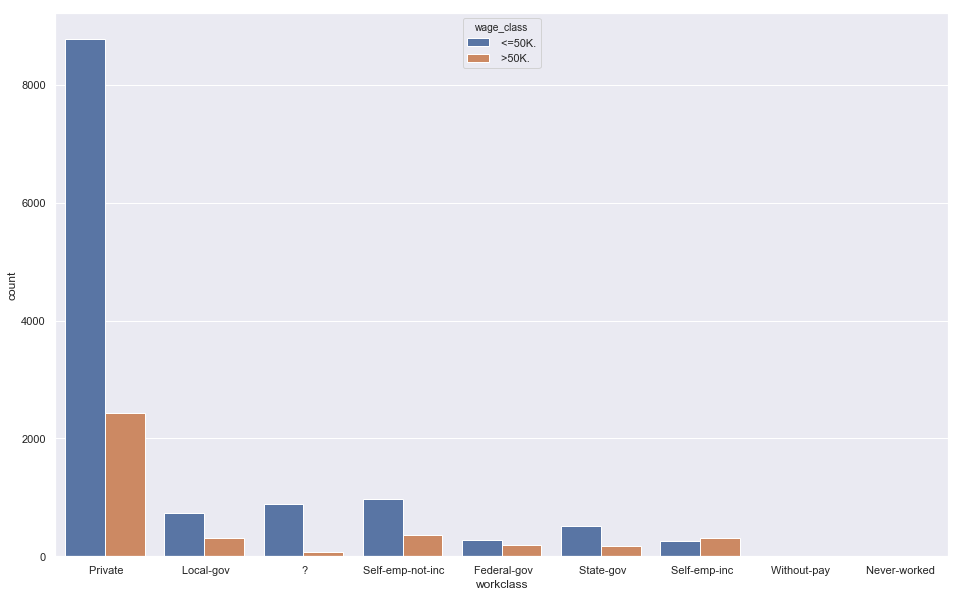

In [38]:
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.countplot(x='workclass',hue='wage_class',data=test_df)
plt.show()

In [39]:
train_df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [40]:
pd.crosstab(train_df['wage_class'],train_df['workclass'])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
wage_class,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,945,14
>50K,191,371,617,0,4963,622,724,353,0


In [41]:
pd.crosstab(train_df['wage_class'],train_df['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
wage_class,,,,,,,,,,,,,,,
<=50K,1652,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277
>50K,191,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320


In [ ]:
#train_df['workclass'].where(train_df['occupation']==' ?')

In [43]:
#train_df[train_df['workclass'] == ' ?' & train_df['wage_class'] == ' >50K']

In [ ]:
#train_df['workclass']=='?'

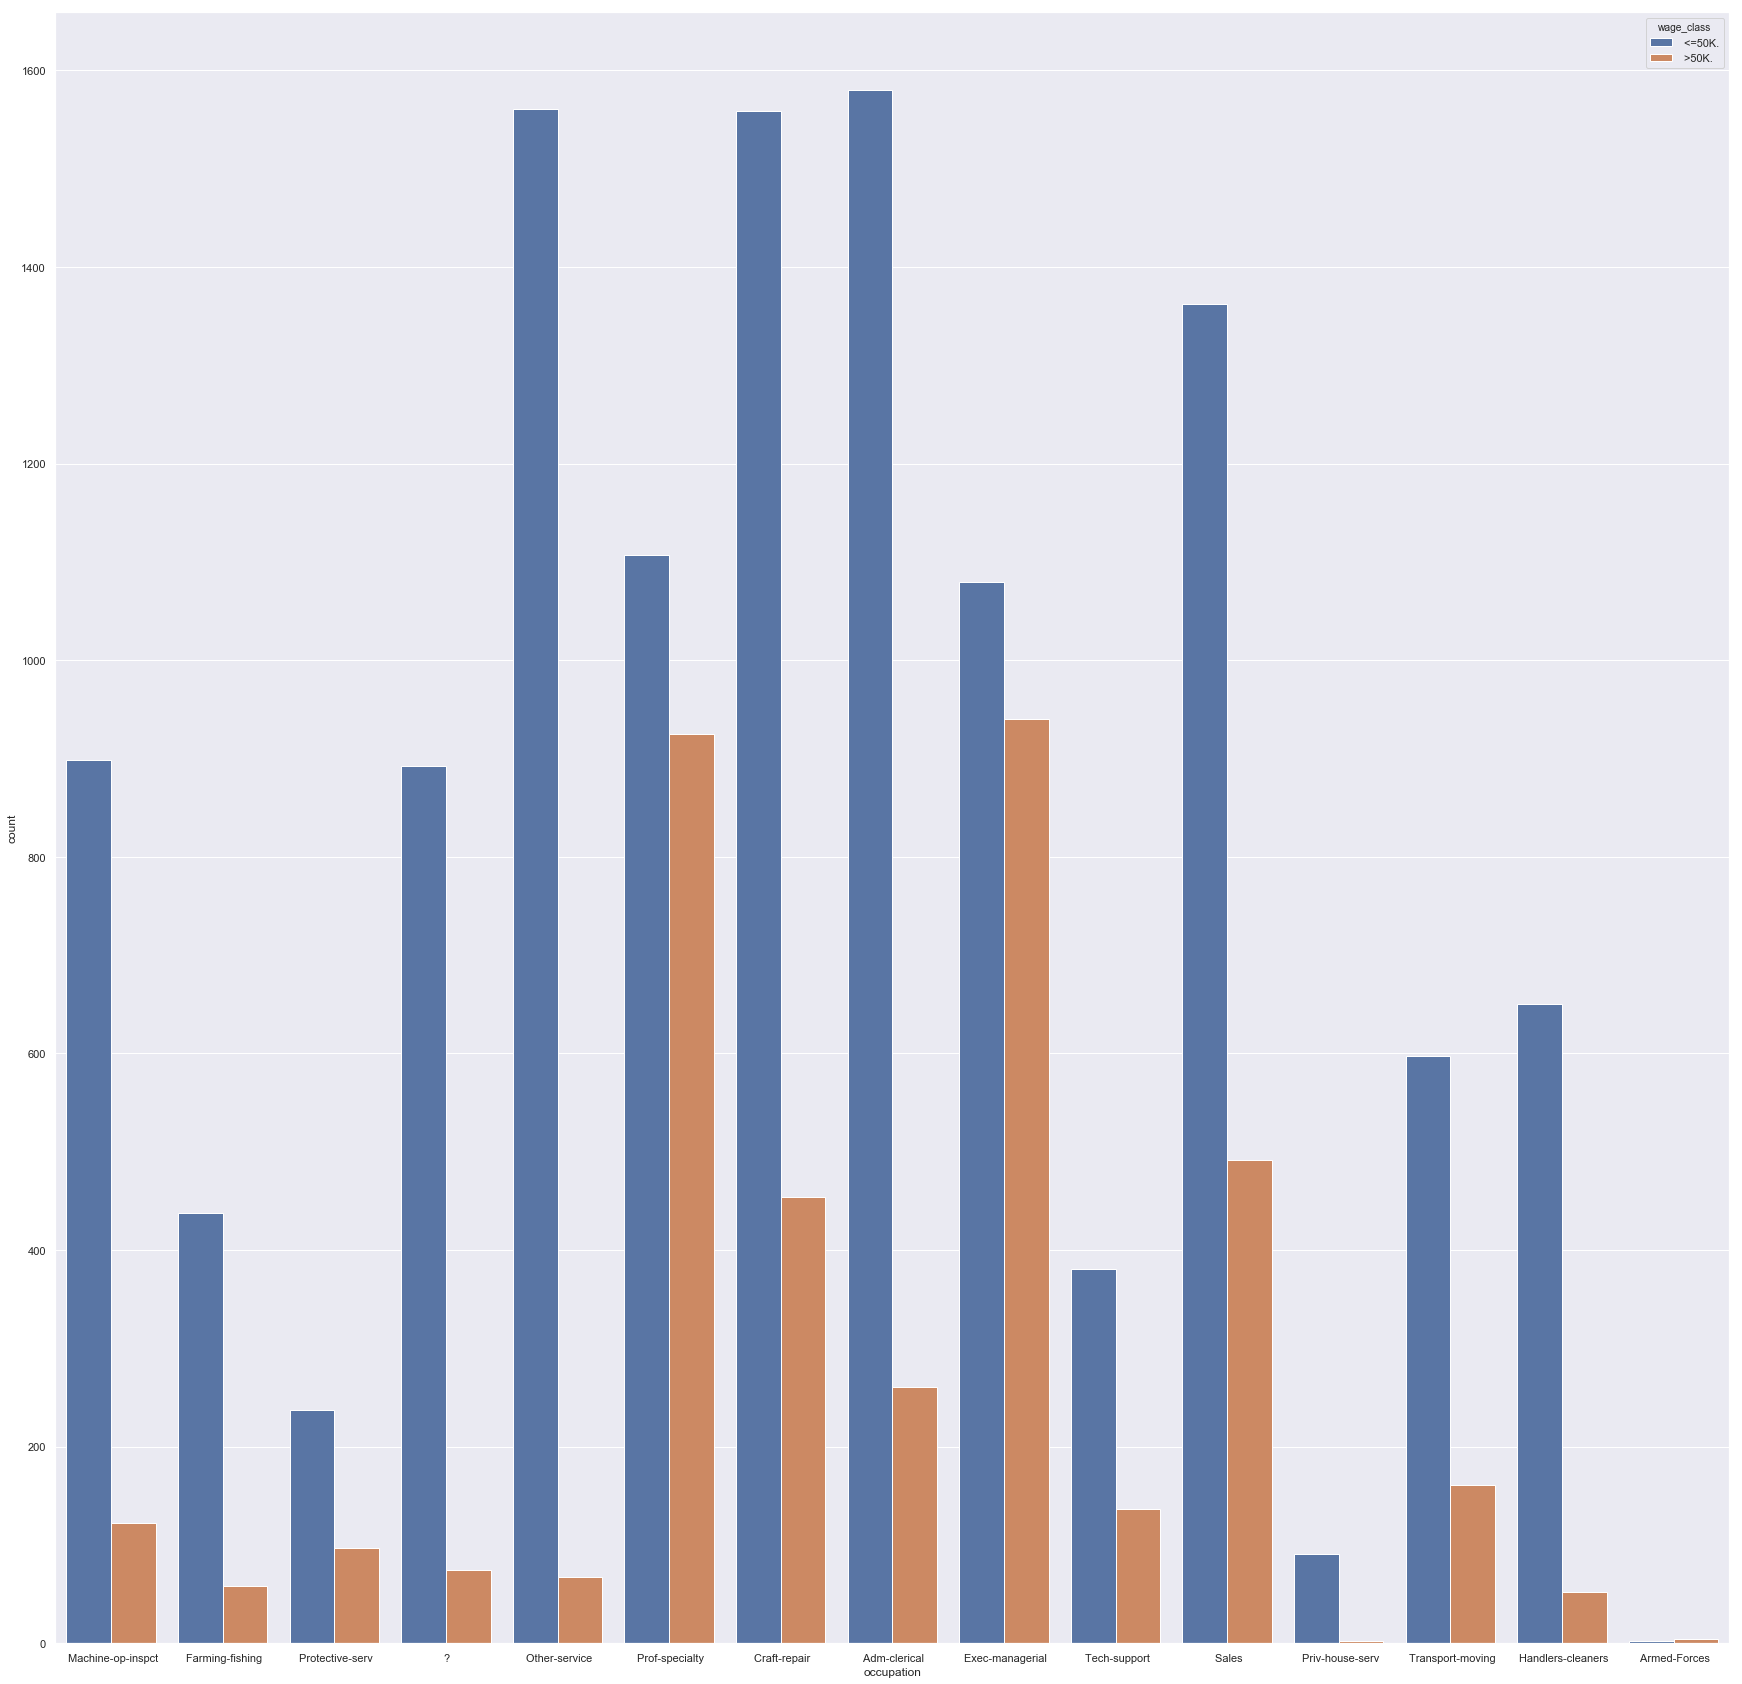

In [44]:
plt.figure(figsize=(30,30))
sns.set(style="darkgrid")
sns.countplot(x='occupation',hue='wage_class',data=test_df)
plt.show()

In [45]:
test_df['occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

In [46]:
pd.crosstab(test_df['wage_class'],test_df['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
wage_class,,,,,,,,,,,,,,,
<=50K.,892,1580,2,1559,1080,438,650,898,1561,91,1107,237,1362,381,597
>50K.,74,261,4,454,940,58,52,122,67,2,925,97,492,137,161


In [47]:
train_df[train_df['workclass']==' ?'].count()

age               1836
workclass         1836
fnlwgt            1836
education         1836
education-num     1836
marital-status    1836
occupation        1836
relationship      1836
race              1836
sex               1836
capital-gain      1836
capital-loss      1836
hours-per-week    1836
native-country    1836
wage_class        1836
dtype: int64

## Missing Value Imputation

In [48]:
#let's remove the missing value ? from the train and test dataset
train_df.replace(' ?',np.nan,inplace=True)

In [49]:
train_df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
wage_class        False
dtype: bool

In [50]:
train_df.shape

(32561, 15)

In [51]:
train_df.dropna(inplace=True)

In [52]:
train_df.shape

(30162, 15)

In [53]:
#Let's remove the missing values from test data 

test_df.replace(' ?',np.nan,inplace=True)

In [54]:
test_df.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
wage_class        False
dtype: bool

In [55]:
test_df.shape

(16281, 15)

In [56]:
test_df.dropna(inplace=True)

In [57]:
test_df.shape

(15060, 15)

In [58]:
#Lets make the 1 hot encoding 
train_data = pd.get_dummies(train_df)
train_data.shape

(30162, 106)

In [59]:
test_data = pd.get_dummies(test_df)
test_data.shape

(15060, 105)

In [60]:
test_data.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia',
       'wage_class_ <=50K.', 'wage_class_ >50K.'],
      dtype='object', length=105)

In [61]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wage_class'],
      dtype='object')

## Model Creation

In [75]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
train_df.wage_class = train_df.wage_class.map({' <=50K':0, ' >50K':1}).astype(int)

In [68]:
test_df.wage_class = test_df.wage_class.map({' <=50K.':0, ' >50K.':1}).astype(int)

In [63]:
X_train = train_df.drop(['wage_class','workclass','education', 
                          'marital-status', 'occupation', 'relationship', 
                          'race', 'sex', 'native-country'], axis=1)

In [72]:
y_train = train_df.wage_class

In [65]:
X_test = test_df.drop(['wage_class','workclass','education', 
                          'marital-status', 'occupation', 'relationship', 
                          'race', 'sex', 'native-country'], axis=1)

In [71]:
y_test = test_df.wage_class

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
age               15060 non-null int64
workclass         15060 non-null object
fnlwgt            15060 non-null int64
education         15060 non-null object
education-num     15060 non-null int64
marital-status    15060 non-null object
occupation        15060 non-null object
relationship      15060 non-null object
race              15060 non-null object
sex               15060 non-null object
capital-gain      15060 non-null int64
capital-loss      15060 non-null int64
hours-per-week    15060 non-null int64
native-country    15060 non-null object
wage_class        15060 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 1.8+ MB


In [77]:
model.fit(X_train,y_train,  eval_set = [(X_train,y_train),(X_test, y_test)], early_stopping_rounds=20)

[0]	validation_0-error:0.196671	validation_1-error:0.201262
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.196671	validation_1-error:0.201262
[2]	validation_0-error:0.196671	validation_1-error:0.201262
[3]	validation_0-error:0.196671	validation_1-error:0.201262
[4]	validation_0-error:0.191698	validation_1-error:0.191633
[5]	validation_0-error:0.191731	validation_1-error:0.191567
[6]	validation_0-error:0.191698	validation_1-error:0.191633
[7]	validation_0-error:0.191698	validation_1-error:0.191633
[8]	validation_0-error:0.177972	validation_1-error:0.180744
[9]	validation_0-error:0.177939	validation_1-error:0.180677
[10]	validation_0-error:0.177906	validation_1-error:0.180677
[11]	validation_0-error:0.177906	validation_1-error:0.180677
[12]	validation_0-error:0.177574	validation_1-error:0.180345
[13]	validation_0-error:0.176712	validation_1-error:0.17

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
predicted = model.predict(X_test)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [79]:
predicted

array([0, 0, 0, ..., 1, 0, 1])

In [80]:
# Import metrics
from sklearn import metrics

metrics.accuracy_score(y_test, predicted)

0.8338645418326693

In [81]:
metrics.confusion_matrix(y_test, predicted)

array([[10919,   441],
       [ 2061,  1639]], dtype=int64)

In [83]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90     11360
          1       0.79      0.44      0.57      3700

avg / total       0.83      0.83      0.82     15060



In [84]:

from xgboost import plot_tree
import graphviz
from matplotlib import pyplot as plt

plot_tree(model, num_trees = 0)
fig = plt.gcf()
fig.set_size_inches(300, 100)
fig.savefig('tree.png')